In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel


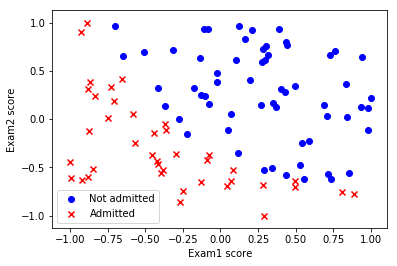

In [4]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("data.csv", header=0)

# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))
X=df[["grade1" , "grade2"]]
X=np.array(X)
X=min_max_scaler.fit_transform(X)
Y=df["label"].map(lambda x:float(x.rstrip(';')))
Y=np.array(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.333)
pos=where(Y==1)
neg=where(Y==0)
plt.scatter(X[pos,0],X[pos,1],marker='o' , c='b')
plt.scatter(X[neg,0] , X[neg,1],marker ='x',c='r')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend(['Not admitted' , 'Admitted'])
show()
m=len(X)
n=len(X[0])
bias = np.ones((m,1))
X=np.concatenate((bias,X),axis=1)
theta=np.zeros((n+1,1))
Y1=Y.reshape((m,1))

In [5]:
def sigmoid(z):
    sig=[]
    for i in range(len(z)):
        r=float ( 1.0 / (1.0 + math.exp(-1*z[i])))
        sig.append(r)
    return sig
def J_theta(m , theta , X, Y1, n):
    X.reshape(m,n+1)
    Y_=np.transpose(Y1)
    theta=np.array(theta)
    h_theta1=sigmoid(np.dot(X,np.transpose(theta)))
    h_theta=(np.array(h_theta1)).reshape((m,1))
    J= (-1/m)*((np.dot(Y_,np.log(h_theta)))+np.dot(np.transpose(np.ones((m,1))-Y1),np.log(np.ones((m,1))-h_theta)))
    return J[0,0]
def del_J_theta(m,theta,X,Y1,n):
    h_theta1=sigmoid(np.dot(X,np.transpose(theta)))
    h_theta=(np.array(h_theta1)).reshape((m,1))
    del_xi=h_theta-Y1;
    print(del_xi)
    print('---'*42)
    del_xi=(np.tile(del_xi,(1,n+1)))
    print(del_xi)
    del_J=np.multiply(X,del_xi)
    del_J=np.sum(del_J,axis=0)
    del_J=del_J.reshape((1,n+1))
    return del_J
def gradient_descent(X,Y1, alpha,theta , num_iters, n, m):
    constant=alpha/m
    for i in range(0,num_iters):
        del_of_theta=del_J_theta(m,theta,X,Y1,n)
        theta=theta-(constant*del_of_theta)
        if(i%100==0):
            print( ' theta is ' , theta , i )
            print(' cost is ' , J_theta(m,theta,X,Y1,n))
            print('\n')
def Logistic_Regression(X,Y1,n,m):
    theta=np.array([0,0,0])
    theta=theta.reshape(1,n+1)
    alpha=4
    num_iters=1000
    gradient_descent(X,Y1,alpha,theta,num_iters,n,m)
    

In [6]:
theta=np.array([0,1,2])
theta=theta.reshape((1,n+1))
del_J_theta(m,theta,X,Y1,n)
Logistic_Regression(X,Y1,n,m)

[[ 0.47738424]
 [ 0.09844268]
 [ 0.41202675]
 [-0.24461649]
 [-0.26396612]
 [ 0.25679946]
 [-0.14781374]
 [-0.68490053]
 [-0.16125154]
 [-0.66456044]
 [ 0.3391482 ]
 [ 0.15299205]
 [-0.23397994]
 [-0.11311476]
 [ 0.4834763 ]
 [-0.24613626]
 [-0.6421228 ]
 [ 0.2744857 ]
 [-0.13994666]
 [-0.65937056]
 [ 0.22908779]
 [-0.31619892]
 [ 0.20692806]
 [ 0.11069168]
 [-0.34971052]
 [-0.4429629 ]
 [-0.67476588]
 [ 0.32912878]
 [ 0.28136538]
 [ 0.32417801]
 [-0.40835305]
 [-0.46598229]
 [ 0.38646392]
 [-0.52361846]
 [ 0.41790177]
 [ 0.26323159]
 [ 0.75223267]
 [-0.28381827]
 [ 0.25445909]
 [ 0.43378158]
 [-0.4875948 ]
 [ 0.19283919]
 [-0.29019606]
 [ 0.28625092]
 [ 0.18144906]
 [ 0.30561664]
 [-0.3348306 ]
 [-0.0971213 ]
 [-0.14250515]
 [-0.10274876]
 [-0.27241854]
 [-0.31754094]
 [-0.62639682]
 [ 0.24484724]
 [ 0.21499583]
 [ 0.32542933]
 [-0.23520355]
 [ 0.70693346]
 [-0.36241735]
 [-0.26890202]
 [-0.17777657]
 [ 0.13144993]
 [ 0.14908783]
 [ 0.13155108]
 [ 0.38206544]
 [ 0.2076669 ]
 [-0.22795

[[ 1.66537643e-01]
 [ 1.04576300e-03]
 [ 1.05886557e-01]
 [-4.18917418e-02]
 [-1.33139589e-02]
 [ 4.38809314e-02]
 [-9.49794296e-03]
 [-5.43368826e-01]
 [-3.94322774e-03]
 [-3.21685817e-01]
 [ 8.37652310e-01]
 [ 8.76067847e-02]
 [-7.22339624e-03]
 [-2.52493758e-03]
 [ 2.34063303e-01]
 [-6.62725017e-02]
 [-5.43698358e-01]
 [ 2.39046700e-01]
 [-4.02484201e-03]
 [-4.39964758e-01]
 [ 1.46654673e-01]
 [-1.08401729e-02]
 [ 3.47444724e-02]
 [ 1.89979328e-03]
 [-3.61662898e-02]
 [-2.31002294e-01]
 [-4.20400297e-01]
 [ 7.90934176e-01]
 [ 1.77013444e-01]
 [ 5.77343025e-02]
 [-1.87804181e-01]
 [-6.17659420e-02]
 [ 2.38243171e-01]
 [-5.77932776e-01]
 [ 1.48244782e-01]
 [ 9.21088719e-02]
 [ 7.54419046e-01]
 [-4.92281615e-02]
 [ 2.92331765e-01]
 [ 1.13916335e-01]
 [-8.26313689e-02]
 [ 3.06835204e-02]
 [-5.72966074e-03]
 [ 5.14488642e-01]
 [ 2.49884528e-02]
 [ 2.25145927e-01]
 [-3.28838781e-02]
 [-2.02909578e-04]
 [-8.01190859e-03]
 [-3.73451917e-04]
 [-1.37348700e-02]
 [-5.38778265e-03]
 [-1.6921040

[[ 1.27281653e-01]
 [ 2.43145619e-04]
 [ 7.14348110e-02]
 [-2.15529151e-02]
 [-5.37702965e-03]
 [ 2.33241387e-02]
 [-3.45672619e-03]
 [-5.58539073e-01]
 [-1.20531518e-03]
 [-2.94816315e-01]
 [ 8.74982209e-01]
 [ 5.31445851e-02]
 [-2.55203877e-03]
 [-6.91953244e-04]
 [ 1.95497961e-01]
 [-3.78981099e-02]
 [-5.56705577e-01]
 [ 1.94001673e-01]
 [-1.22572490e-03]
 [-4.33386655e-01]
 [ 1.03515957e-01]
 [-4.24516316e-03]
 [ 1.73068694e-02]
 [ 5.00879918e-04]
 [-1.84343793e-02]
 [-1.88079981e-01]
 [-4.10840569e-01]
 [ 8.28010849e-01]
 [ 1.32760503e-01]
 [ 3.31573649e-02]
 [-1.43939972e-01]
 [-3.63278064e-02]
 [ 1.96940228e-01]
 [-5.91811903e-01]
 [ 1.08894665e-01]
 [ 5.83035520e-02]
 [ 8.03400893e-01]
 [-2.65129055e-02]
 [ 2.49598650e-01]
 [ 7.85506000e-02]
 [-5.22434017e-02]
 [ 1.48119537e-02]
 [-1.95745141e-03]
 [ 5.09079844e-01]
 [ 1.14969915e-02]
 [ 1.80845443e-01]
 [-1.63636605e-02]
 [-3.33330074e-05]
 [-2.80993632e-03]
 [-6.94814820e-05]
 [-5.59443926e-03]
 [-1.82884252e-03]
 [-1.3086674

 [-6.07862534e-04 -6.07862534e-04 -6.07862534e-04]]
[[ 1.11822644e-01]
 [ 1.22576311e-04]
 [ 5.91494989e-02]
 [-1.57040651e-02]
 [-3.50522173e-03]
 [ 1.72752851e-02]
 [-2.14557075e-03]
 [-5.65654263e-01]
 [-6.90008734e-04]
 [-2.82713109e-01]
 [ 8.89775060e-01]
 [ 4.17828249e-02]
 [-1.56344512e-03]
 [-3.76325975e-04]
 [ 1.79230038e-01]
 [-2.89884747e-02]
 [-5.62777000e-01]
 [ 1.75188554e-01]
 [-7.00365157e-04]
 [-4.30334997e-01]
 [ 8.74187813e-02]
 [-2.72910521e-03]
 [ 1.24359104e-02]
 [ 2.67805267e-04]
 [-1.33854143e-02]
 [-1.70098506e-01]
 [-4.06421327e-01]
 [ 8.43479371e-01]
 [ 1.15438193e-01]
 [ 2.54634679e-02]
 [-1.26422579e-01]
 [-2.81985146e-02]
 [ 1.79558538e-01]
 [-5.98166372e-01]
 [ 9.38496825e-02]
 [ 4.68096629e-02]
 [ 8.23869213e-01]
 [-1.97350726e-02]
 [ 2.30999746e-01]
 [ 6.57200629e-02]
 [-4.19388408e-02]
 [ 1.04893583e-02]
 [-1.18102218e-03]
 [ 5.06469346e-01]
 [ 7.96303629e-03]
 [ 1.62531605e-01]
 [-1.17501197e-02]
 [-1.42697668e-05]
 [-1.71438540e-03]
 [-3.15308436e-05

 [-4.71441002e-04 -4.71441002e-04 -4.71441002e-04]]
[[ 1.05524128e-01]
 [ 9.05394913e-05]
 [ 5.43718908e-02]
 [-1.36453425e-02]
 [-2.90044194e-03]
 [ 1.51187963e-02]
 [-1.73733379e-03]
 [-5.68810052e-01]
 [-5.39153472e-04]
 [-2.77474409e-01]
 [ 8.95804510e-01]
 [ 3.75316454e-02]
 [-1.25875688e-03]
 [-2.87462210e-04]
 [ 1.72378224e-01]
 [-2.57304696e-02]
 [-5.65471373e-01]
 [ 1.67329927e-01]
 [-5.46781784e-04]
 [-4.29005067e-01]
 [ 8.10438414e-02]
 [-2.24449330e-03]
 [ 1.07392720e-02]
 [ 2.03019912e-04]
 [-1.16140291e-02]
 [-1.62599574e-01]
 [-4.04490598e-01]
 [ 8.49938121e-01]
 [ 1.08419379e-01]
 [ 2.26429132e-02]
 [-1.19279616e-01]
 [-2.51961416e-02]
 [ 1.72257506e-01]
 [-6.00974497e-01]
 [ 8.78085559e-02]
 [ 4.24422922e-02]
 [ 8.32371909e-01]
 [-1.73098758e-02]
 [ 2.23077345e-01]
 [ 6.06899373e-02]
 [-3.80315343e-02]
 [ 9.00047609e-03]
 [-9.44507606e-04]
 [ 5.05294031e-01]
 [ 6.76639189e-03]
 [ 1.54914788e-01]
 [-1.01452773e-02]
 [-9.80620787e-06]
 [-1.37771065e-03]
 [-2.22338275e-05

 [-3.86604317e-04]]
------------------------------------------------------------------------------------------------------------------------------
[[ 1.00904446e-01  1.00904446e-01  1.00904446e-01]
 [ 7.17640648e-05  7.17640648e-05  7.17640648e-05]
 [ 5.09548862e-02  5.09548862e-02  5.09548862e-02]
 [-1.22491775e-02 -1.22491775e-02 -1.22491775e-02]
 [-2.50818096e-03 -2.50818096e-03 -2.50818096e-03]
 [ 1.36460232e-02  1.36460232e-02  1.36460232e-02]
 [-1.47764062e-03 -1.47764062e-03 -1.47764062e-03]
 [-5.71234988e-01 -5.71234988e-01 -5.71234988e-01]
 [-4.46207125e-04 -4.46207125e-04 -4.46207125e-04]
 [-2.73503775e-01 -2.73503775e-01 -2.73503775e-01]
 [ 9.00226742e-01  9.00226742e-01  9.00226742e-01]
 [ 3.45546415e-02  3.45546415e-02  3.45546415e-02]
 [-1.06593491e-03 -1.06593491e-03 -1.06593491e-03]
 [-2.33808171e-04 -2.33808171e-04 -2.33808171e-04]
 [ 1.67260379e-01  1.67260379e-01  1.67260379e-01]
 [-2.34765528e-02 -2.34765528e-02 -2.34765528e-02]
 [-5.67543420e-01 -5.67543420e-01 -5.

[[ 9.76443552e-02  9.76443552e-02  9.76443552e-02]
 [ 6.05644368e-05  6.05644368e-05  6.05644368e-05]
 [ 4.85888447e-02  4.85888447e-02  4.85888447e-02]
 [-1.13202404e-02 -1.13202404e-02 -1.13202404e-02]
 [-2.25572467e-03 -2.25572467e-03 -2.25572467e-03]
 [ 1.26608836e-02  1.26608836e-02  1.26608836e-02]
 [-1.31291997e-03 -1.31291997e-03 -1.31291997e-03]
 [-5.73007581e-01 -5.73007581e-01 -5.73007581e-01]
 [-3.88644859e-04 -3.88644859e-04 -3.88644859e-04]
 [-2.70631248e-01 -2.70631248e-01 -2.70631248e-01]
 [ 9.03347319e-01  9.03347319e-01  9.03347319e-01]
 [ 3.25260060e-02  3.25260060e-02  3.25260060e-02]
 [-9.44098223e-04 -9.44098223e-04 -9.44098223e-04]
 [-2.01080626e-04 -2.01080626e-04 -2.01080626e-04]
 [ 1.63598565e-01  1.63598565e-01  1.63598565e-01]
 [-2.19545234e-02 -2.19545234e-02 -2.19545234e-02]
 [-5.69059234e-01 -5.69059234e-01 -5.69059234e-01]
 [ 1.57330128e-01  1.57330128e-01  1.57330128e-01]
 [-3.93699810e-04 -3.93699810e-04 -3.93699810e-04]
 [-4.27260601e-01 -4.27260601e-

[[ 9.55506107e-02]
 [ 5.41683959e-05]
 [ 4.70893624e-02]
 [-1.07477068e-02]
 [-2.10368834e-03]
 [ 1.20514372e-02]
 [-1.21472495e-03]
 [-5.74174517e-01]
 [-3.54897977e-04]
 [-2.68753880e-01]
 [ 9.05351375e-01]
 [ 3.12547580e-02]
 [-8.71660757e-04]
 [-1.82096063e-04]
 [ 1.61223882e-01]
 [-2.10067342e-02]
 [-5.70057748e-01]
 [ 1.54640349e-01]
 [-3.59401797e-04]
 [-4.26780580e-01]
 [ 7.11919445e-02]
 [-1.61123777e-03]
 [ 8.36973915e-03]
 [ 1.26933180e-04]
 [-9.12632926e-03]
 [-1.50513601e-01]
 [-4.01251532e-01]
 [ 8.60370458e-01]
 [ 9.73662184e-02]
 [ 1.85414423e-02]
 [-1.07979023e-01]
 [-2.08056741e-02]
 [ 1.60405601e-01]
 [-6.05746854e-01]
 [ 7.83586210e-02]
 [ 3.59110387e-02]
 [ 8.46017200e-01]
 [-1.38521459e-02]
 [ 2.10075675e-01]
 [ 5.29718973e-02]
 [-3.21975589e-02]
 [ 6.93919291e-03]
 [-6.46675277e-04]
 [ 5.03273317e-01]
 [ 5.13153692e-03]
 [ 1.42657741e-01]
 [-7.90647299e-03]
 [-5.19247536e-06]
 [-9.51010101e-04]
 [-1.22988127e-05]
 [-2.20792737e-03]
 [-6.00450313e-04]
 [-9.9467646

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 9.12079594e-02]
 [ 4.26737241e-05]
 [ 4.40300573e-02]
 [-9.61892417e-03]
 [-1.81228107e-03]
 [ 1.08443497e-02]
 [-1.02883515e-03]
 [-5.76670666e-01]
 [-2.92293762e-04]
 [-2.64774074e-01]
 [ 9.09507809e-01]
 [ 2.86970696e-02]
 [-7.34972928e-04]
 [-1.47327581e-04]
 [ 1.56238599e-01]
 [-1.91144531e-02]
 [-5.72195470e-01]
 [ 1.49015974e-01]
 [-2.95806318e-04]
 [-4.25760827e-01]
 [ 6.70016781e-02]
 [-1.38143265e-03]
 [ 7.45335647e-03]
 [ 1.02062747e-04]
 [-8.15910661e-03]
 [-1.45166816e-01]
 [-3.99762076e-01]
 [ 8.64998201e-01]
 [ 9.25807347e-02]
 [ 1.68932580e-02]
 [-1.03066061e-01]
 [-1.90320156e-02]
 [ 1.55124301e-01]
 [-6.07970280e-01]
 [ 7.42913710e-02]
 [ 3.32168586e-02]
 [ 8.52026199e-01]
 [-1.24885966e-02]
 [ 2.04224850e-01]
 [ 4.97094539e-02]
 [-2.97942212e-02]
 [ 6.14863168e-03]
 [-5.42406556e-04]
 [ 5.02324141e-01]
 [ 4.51241007e-03]
 [ 1.37241965e-01]
 [-7.04153229e-03]
 [-3.86565611e-06]
 [-8.00704722e-04]
 [-9.34374338e-06]
 [-1.90470524e-03]
 [-5.03141984e-04]
 [-9.5156931

 [-2.50473054e-04]]
------------------------------------------------------------------------------------------------------------------------------
[[ 9.11546853e-02  9.11546853e-02  9.11546853e-02]
 [ 4.25464250e-05  4.25464250e-05  4.25464250e-05]
 [ 4.39929565e-02  4.39929565e-02  4.39929565e-02]
 [-9.60556129e-03 -9.60556129e-03 -9.60556129e-03]
 [-1.80889982e-03 -1.80889982e-03 -1.80889982e-03]
 [ 1.08300133e-02  1.08300133e-02  1.08300133e-02]
 [-1.02669735e-03 -1.02669735e-03 -1.02669735e-03]
 [-5.76701951e-01 -5.76701951e-01 -5.76701951e-01]
 [-2.91584227e-04 -2.91584227e-04 -2.91584227e-04]
 [-2.64724502e-01 -2.64724502e-01 -2.64724502e-01]
 [ 9.09558797e-01  9.09558797e-01  9.09558797e-01]
 [ 2.86663558e-02  2.86663558e-02  2.86663558e-02]
 [-7.33404593e-04 -7.33404593e-04 -7.33404593e-04]
 [-1.46937187e-04 -1.46937187e-04 -1.46937187e-04]
 [ 1.56176923e-01  1.56176923e-01  1.56176923e-01]
 [-1.90918521e-02 -1.90918521e-02 -1.90918521e-02]
 [-5.72222280e-01 -5.72222280e-01 -5.

 [-2.50005900e-04 -2.50005900e-04 -2.50005900e-04]]
[[ 9.11139812e-02]
 [ 4.24493740e-05]
 [ 4.39646166e-02]
 [-9.59535920e-03]
 [-1.80631945e-03]
 [ 1.08190672e-02]
 [-1.02506622e-03]
 [-5.76725865e-01]
 [-2.91043024e-04]
 [-2.64686614e-01]
 [ 9.09597755e-01]
 [ 2.86428996e-02]
 [-7.32208021e-04]
 [-1.46639470e-04]
 [ 1.56129791e-01]
 [-1.90745937e-02]
 [-5.72242773e-01]
 [ 1.48893567e-01]
 [-2.94536232e-04]
 [-4.25738383e-01]
 [ 6.69116955e-02]
 [-1.37674307e-03]
 [ 7.43427008e-03]
 [ 1.01572038e-04]
 [-8.13892629e-03]
 [-1.45050522e-01]
 [-3.99729259e-01]
 [ 8.65098958e-01]
 [ 9.24773751e-02]
 [ 1.68585030e-02]
 [-1.02959806e-01]
 [-1.89945507e-02]
 [ 1.55009151e-01]
 [-6.08019484e-01]
 [ 7.42036855e-02]
 [ 3.31595689e-02]
 [ 8.52156686e-01]
 [-1.24600183e-02]
 [ 2.04096884e-01]
 [ 4.96395275e-02]
 [-2.97431356e-02]
 [ 6.13220993e-03]
 [-5.40303226e-04]
 [ 5.02303092e-01]
 [ 4.49960164e-03]
 [ 1.37124215e-01]
 [-7.02352282e-03]
 [-3.84053306e-06]
 [-7.97666793e-04]
 [-9.28718003e-06

 [-2.49733530e-04 -2.49733530e-04 -2.49733530e-04]]
[[ 9.10907555e-02]
 [ 4.23940792e-05]
 [ 4.39484488e-02]
 [-9.58954097e-03]
 [-1.80484831e-03]
 [ 1.08128243e-02]
 [-1.02413638e-03]
 [-5.76739515e-01]
 [-2.90734572e-04]
 [-2.64664990e-01]
 [ 9.09619984e-01]
 [ 2.86295199e-02]
 [-7.31525928e-04]
 [-1.46469812e-04]
 [ 1.56102894e-01]
 [-1.90647501e-02]
 [-5.72254471e-01]
 [ 1.48863311e-01]
 [-2.94223011e-04]
 [-4.25732834e-01]
 [ 6.68894619e-02]
 [-1.37558589e-03]
 [ 7.42955791e-03]
 [ 1.01451061e-04]
 [-8.13394381e-03]
 [-1.45021777e-01]
 [-3.99721145e-01]
 [ 8.65123863e-01]
 [ 9.24518323e-02]
 [ 1.68499196e-02]
 [-1.02933547e-01]
 [-1.89852977e-02]
 [ 1.54980687e-01]
 [-6.08031651e-01]
 [ 7.41820172e-02]
 [ 3.31454171e-02]
 [ 8.52188937e-01]
 [-1.24529615e-02]
 [ 2.04065250e-01]
 [ 4.96222505e-02]
 [-2.97305165e-02]
 [ 6.12815591e-03]
 [-5.39784379e-04]
 [ 5.02297887e-01]
 [ 4.49643997e-03]
 [ 1.37095110e-01]
 [-7.01907657e-03]
 [-3.83434593e-06]
 [-7.96917362e-04]
 [-9.27324609e-06

 [-2.49573778e-04 -2.49573778e-04 -2.49573778e-04]]
[[ 9.10771237e-02]
 [ 4.23616528e-05]
 [ 4.39389603e-02]
 [-9.58612710e-03]
 [-1.80398525e-03]
 [ 1.08091612e-02]
 [-1.02359092e-03]
 [-5.76747528e-01]
 [-2.90553651e-04]
 [-2.64652297e-01]
 [ 9.09633031e-01]
 [ 2.86216683e-02]
 [-7.31125812e-04]
 [-1.46370308e-04]
 [ 1.56087106e-01]
 [-1.90589738e-02]
 [-5.72261338e-01]
 [ 1.48845552e-01]
 [-2.94039294e-04]
 [-4.25729576e-01]
 [ 6.68764132e-02]
 [-1.37490704e-03]
 [ 7.42679307e-03]
 [ 1.01380110e-04]
 [-8.13102033e-03]
 [-1.45004905e-01]
 [-3.99716382e-01]
 [ 8.65138482e-01]
 [ 9.24368407e-02]
 [ 1.68448829e-02]
 [-1.02918135e-01]
 [-1.89798679e-02]
 [ 1.54963980e-01]
 [-6.08038794e-01]
 [ 7.41692999e-02]
 [ 3.31371122e-02]
 [ 8.52207867e-01]
 [-1.24488208e-02]
 [ 2.04046681e-01]
 [ 4.96121108e-02]
 [-2.97231110e-02]
 [ 6.12577730e-03]
 [-5.39480030e-04]
 [ 5.02294831e-01]
 [ 4.49458499e-03]
 [ 1.37078028e-01]
 [-7.01646776e-03]
 [-3.83071850e-06]
 [-7.96477748e-04]
 [-9.26507612e-06

 [-2.49426812e-04 -2.49426812e-04 -2.49426812e-04]]
[[ 9.10645768e-02]
 [ 4.23318252e-05]
 [ 4.39302275e-02]
 [-9.58298560e-03]
 [-1.80319115e-03]
 [ 1.08057903e-02]
 [-1.02308907e-03]
 [-5.76754905e-01]
 [-2.90387209e-04]
 [-2.64640612e-01]
 [ 9.09645040e-01]
 [ 2.86144425e-02]
 [-7.30757687e-04]
 [-1.46278772e-04]
 [ 1.56072574e-01]
 [-1.90536581e-02]
 [-5.72267659e-01]
 [ 1.48829206e-01]
 [-2.93870279e-04]
 [-4.25726577e-01]
 [ 6.68644036e-02]
 [-1.37428244e-03]
 [ 7.42424886e-03]
 [ 1.01314841e-04]
 [-8.12833011e-03]
 [-1.44989376e-01]
 [-3.99711997e-01]
 [ 8.65151937e-01]
 [ 9.24230424e-02]
 [ 1.68402477e-02]
 [-1.02903950e-01]
 [-1.89748710e-02]
 [ 1.54948602e-01]
 [-6.08045369e-01]
 [ 7.41575949e-02]
 [ 3.31294690e-02]
 [ 8.52225290e-01]
 [-1.24450104e-02]
 [ 2.04029589e-01]
 [ 4.96027788e-02]
 [-2.97162957e-02]
 [ 6.12358852e-03]
 [-5.39200019e-04]
 [ 5.02292018e-01]
 [ 4.49287810e-03]
 [ 1.37062304e-01]
 [-7.01406713e-03]
 [-3.82738239e-06]
 [-7.96073285e-04]
 [-9.25756180e-06